# Part 6B - NLP EDA - Movie Reviews

## Sentiment Analysis and Rating Prediction of Movie Reviews

#### Overview:

This project is an extension of the movies project. This portion focuses on applying Natural Language Processing (NLP) techniques to analyze a dataset of movie reviews. Students will leverage NLP tools such as NLTK, SpaCy, wordcloud, and Scikit-Learn to explore, analyze, and model text data. The ultimate goal is to establish a relationship between the textual content of the reviews and their associated ratings and subsequently predict these ratings.

#### Dataset: TMDB Movie Reviews

[![Image](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1700174921__pastedimage0.png)](https://drive.google.com/file/d/10XnBycJ2bGStZJ2kWoyzZRrInKJlaiYZ/view?usp=sharing)

[TMDB movie reviews](https://drive.google.com/file/d/1vLUzSYleJXqsjNMsq76yTQ5fmNlSHFJI/view?usp=sharing). Ratings range from 1 to 10

- Gathered through the tmdbsimple python wrapper for the TMDB API. To legally cite TMDB, please follow their attribution requirements, which we have [summarized here](https://docs.google.com/document/d/1LzFQDulDdQjiMuZ8sBYeDbHnN62ZWjFU_xt_4eSwVIw/edit?usp=sharing).



- Note: if you have an alternative text classification dataset that you would like to use for this project, **please contact your instructor immediately for approval.**

## Tasks:
<!-- 
**0) Update Your Project 2 Repo**

- Create a new "Data-NLP/" folder in your Project 2 repository.
- Add the downloaded review file to this new Data-NLP folder.

- Make sure you have an "Images/" folder. If not, create one.



**1) Data Preprocessing:**

- Load and inspect the dataset.
    - How many reviews?
    - What does the distribution of ratings look like?
    - Any null values?



- Use the rating column to create a new target column with two groups: high-rating and low-rating groups.
    - We recommend defining "High-rating" reviews as any review with a rating >=9; and "Low-rating" reviews as any review with a rating <=4. The middle ratings between 4 and 9 will be excluded from the analysis.
    - You may use an alternative definition for High and Low reviews, but justify your choice in your notebook/README.



- Utilize NLTK and SpaCy for basic text processing, including:

    - removing stopwords
    - tokenization
    - lemmatization
    - Tips:
        - Be sure to create a custom nlp object and disable the named entity recognizer. Otherwise, processing will take a very long time!
        - **You will want to create several versions of the data, lemmatized, tokenized, lemmatized, and joined back to one string per review, and tokenized and joined back to one string per review.** This will be useful for different analysis and modeling techniques.

    

- Save your processed data frame in a **joblib** file saved in the "Data-NLP/" folder for future modeling.

     -->

**2) EDA and Visualization:**

- Create word clouds to visualize the most frequent and significant words in each group.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your wordclouds as .png files in the "Images/" folder in your repo.**



- Apply nltk's `FreqDist` class to compare the frequency distribution of words in the review groups.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your freq dist plots as .png files in the "Images/" folder in your repo.**



- Perform n-grams analysis (bigrams and trigrams),
    - Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)
    - Focus on bigrams or trigrams, using NLTK's `BigramCollocationFinder` and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.
    - Describe any differences. What do these differences tell you?
    - Save your



- Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

    - Compare the sentiments of high-rating and low-rating texts.

    - Compare the average sentiment scores for high and low-rating reviews.

    - Which review polarity scores don't match the ratings? Why do you think this is?

        

**3) Evaluation and Reporting:**

- Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?
    - List 3 things associated with high-rating reviews
    - List 3 things associated with low-rating reviews.


### Files to Track

In [1]:
import os, sys, joblib
# sys.path.append(os.path.abspath("../NLP/"))
# sys.path.append(os.path.abspath("../"))
# sys.path.append(os.path.abspath("../../"))
%load_ext autoreload
%autoreload 2
    
# import custom_functions as fn
import project_functions as pf

In [2]:
!pip install -U dojo_ds -q
import dojo_ds as ds
ds.__version__

'1.0.3'

In [3]:
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import os, json
from pprint import pprint
pd.set_option("display.max_columns",50)
# pd.set_option('display.max_colwidth', 250)

fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [4]:

FPATHS_FILE = "config/filepaths.json"

In [5]:
with open(FPATHS_FILE) as f:
    FPATHS = json.load(f)
FPATHS

{'data': {'raw': {'movie-reviews': 'Data-NLP/tmdb-movie-reviews.csv.gz',
   'movie-info': 'Data-NLP/tmdb-movie-info.csv.gz',
   'movie-reviews-with-info-json': 'Data-NLP/combined-tmdb-movie-reviews-with-info.json',
   'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
   'processed-joblib': 'Data-NLP/processed-nlp-reviews.joblib',
   'processed-json': 'Data-NLP/processed-nlp-reviews.json'},
  'ml': {'reviews-with-target-json': 'Data-NLP/processed-nlp-reviews-for-ml.json',
   'train': 'Data-NLP/training-data.joblib',
   'test': 'Data-NLP/testing-data.joblib'},
  'nn': {'train': 'data/training-data-tf/', 'test': 'data/testing-data-tf/'}},
 'models': {'ml': {'bayes': 'Models/bayes-clf.joblib',
   'random_forest': 'Models/random-forest.joblib',
   'logreg': 'Models/log-reg.joblib'},
  'nn': {'LSTM': 'Models/keras/lstm/',
   'GRU': 'Models/keras/gru/',
   'Attention': 'Models/keras/attn/'}},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json

In [6]:
# Fpath for saving final df with target columns
fpath_out_ml_with_targets = FPATHS['data']['ml']['reviews-with-target-json']
fpath_out_ml_with_targets

'Data-NLP/processed-nlp-reviews-for-ml.json'

In [7]:
# Fpath for saving reviews merged with movie info df
fpath_out_combined_reviews_movies = FPATHS['data']['raw']['movie-reviews-with-info-json']
fpath_out_combined_reviews_movies

'Data-NLP/combined-tmdb-movie-reviews-with-info.json'

## Load Data (Options)

- From JSON/joblib
- From AWS

### Opt A) Load from JSON(/joblib)

In [8]:
## If using joblib
# reviews_fpath = FPATHS['data']['raw']['processed-joblib']
# reviews_fpath

In [9]:
# import joblib
# df = joblib.load(reviews_fpath)
# df

In [10]:
## Load metadata for financial info
fpath =  FPATHS['data']['raw']['movie-info']
df_movies = pd.read_csv(fpath)
df_movies

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,reviews_file
0,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,Two neighbors become intimate after discoverin...,27.940,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,2433,PG,Data-NLP/reviews/tmdb_reviews_843.json
1,tt0120467,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,Vulgar is about a man who is a children's clow...,7.887,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.444,45,R,NaN
2,tt0120630,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,en,Chicken Run,The creators of Wallace & Gromit bring you an ...,91.080,/oYbVT9e0k2ZSrRhDSCw2Yqshe1n.jpg,"[{'id': 297, 'logo_path': '/58TnhYZqbMYgkHM6lg...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-23,224834564,84,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's nothing more determined than poultry w...,Chicken Run,False,6.800,4704,G,Data-NLP/reviews/tmdb_reviews_7443.json
3,tt0120753,False,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,11.473,/iGRyPsZF0lfIL3IadmBdoAsYzyn.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-02-09,105983,122,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.893,303,R,NaN
4,tt0120755,False,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,43.305,/1VMWLpk9VXyYcEZ8w3uUhp0OF1v.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-24,546400000,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.123,6299,NaN,Data-NLP/reviews/tmdb_reviews_955.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,tt9663764,False,/jXJxMcVoEuXzym3vFnjqDW4ifo6.jpg,"{'id': 573693, 'name': 'Aquaman Collection', '...",205000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.aquamanmovie.com,572802,en,Aquaman and the Lost Kingdom,"Black Manta, still driven by the need to aveng...",1139.841,/8xV47NDrjdZDpkVcCFqkdHa3T0C.jpg,"[{'id': 174, 'logo_path': '/2Jeytq7R4CBLGsHKtR...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-12-20,375063347,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The tide is turning.,Aquaman and the Lost Kingdom,False,6.531,509,PG-13,Data-NLP/reviews/tmdb_reviews_572802.json
6126,tt11762114,False,/u9x18arVbh9VRY05aeJ43eaiI3t.jpg,NaN,36000000,"[{'id': 35, 'name': 'Comedy'}]",https://www.meangirls.com,673593,en,Mean Girls,New student Cady Heron is welcomed into the to...,276.559,/fbbj3viSUDEGT1fFFMNpHP1iUjw.j

In [11]:
## If using json
reviews_fpath = FPATHS['data']['raw']['processed-json']
reviews_fpath

'Data-NLP/processed-nlp-reviews.json'

In [12]:
df = pd.read_json(reviews_fpath)
# df = df.reset_index(drop=False)
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...
...,...,...,...,...,...,...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear marvel get catch make sure character get ...
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00,Third viewing of this and while not the strong...,"[third, viewing, of, this, and, while, not, th...","[viewing, strongest, mcu, avenger, movies, goo...","[viewing, strong, mcu, avenger, movie, good, p...",third viewing of this and while not the strong...,viewing strongest mcu avenger movies good part...,viewing strong mcu avenger movie good part int...
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I...","[cool, seeing, them, all, together, again, eve...","[cool, seeing, massively, enjoy, good, opinion...","[cool, see, massively, enjoy, good, opinion, a...",cool seeing them all together again even if i ...,cool seeing massively enjoy good opinion aveng...,cool see massively enjoy good opinion

In [13]:
# Check for duplciate review ids
df.duplicated(subset=['review_id']).sum()

0

In [14]:
# Check for duplicated review text
df.duplicated(subset=['review_text']).sum()

4

In [15]:
dup_cols = ['review_text','rating']
df.duplicated(subset=dup_cols).sum()

0

In [16]:
df = df.drop_duplicates(subset=dup_cols)
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...
...,...,...,...,...,...,...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear marvel get catch make sure character get ...
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00,Third viewing of this and while not the strong...,"[third, viewing, of, this, and, while, not, th...","[viewing, strongest, mcu, avenger, movies, goo...","[viewing, strong, mcu, avenger, movie, good, p...",third viewing of this and while not the strong...,viewing strongest mcu avenger movies good part...,viewing strong mcu avenger movie good part int...
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I...","[cool, seeing, them, all, together, again, eve...","[cool, seeing, massively, enjoy, good, opinion...","[cool, see, massively, enjoy, good, opinion, a...",cool seeing them all together again even if i ...,cool seeing massively enjoy good opinion aveng...,cool see massively enjoy good opinion

In [17]:
df.shape

(8965, 12)

In [18]:
df.isna().sum()

movie_id                  0
review_id                 0
rating                 1215
review_text               0
created_at                0
review_text_raw           0
tokens-dirty              0
tokens                    0
lemmas                    0
tokens-dirty-joined       0
tokens-joined             0
lemmas-joined             0
dtype: int64

### Adding Financial/Movie Data to NLP df

In [19]:
df_movies.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,reviews_file
0,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,Two neighbors become intimate after discoverin...,27.940,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,2433,PG,Data-NLP/reviews/tmdb_reviews_843.json
1,tt0120467,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,Vulgar is about a man who is a children's clow...,7.887,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.444,45,R,NaN


In [20]:
# Rename id to movie_id for cleaner merge
rename_cols = {'id':'movie_id'}
df_movies = df_movies.rename(rename_cols,axis=1)
df_movies

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,movie_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,reviews_file
0,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,Two neighbors become intimate after discoverin...,27.940,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,2433,PG,Data-NLP/reviews/tmdb_reviews_843.json
1,tt0120467,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,Vulgar is about a man who is a children's clow...,7.887,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.444,45,R,NaN
2,tt0120630,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,en,Chicken Run,The creators of Wallace & Gromit bring you an ...,91.080,/oYbVT9e0k2ZSrRhDSCw2Yqshe1n.jpg,"[{'id': 297, 'logo_path': '/58TnhYZqbMYgkHM6lg...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-23,224834564,84,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's nothing more determined than poultry w...,Chicken Run,False,6.800,4704,G,Data-NLP/reviews/tmdb_reviews_7443.json
3,tt0120753,False,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,11.473,/iGRyPsZF0lfIL3IadmBdoAsYzyn.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-02-09,105983,122,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.893,303,R,NaN
4,tt0120755,False,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,43.305,/1VMWLpk9VXyYcEZ8w3uUhp0OF1v.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-24,546400000,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.123,6299,NaN,Data-NLP/reviews/tmdb_reviews_955.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,tt9663764,False,/jXJxMcVoEuXzym3vFnjqDW4ifo6.jpg,"{'id': 573693, 'name': 'Aquaman Collection', '...",205000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.aquamanmovie.com,572802,en,Aquaman and the Lost Kingdom,"Black Manta, still driven by the need to aveng...",1139.841,/8xV47NDrjdZDpkVcCFqkdHa3T0C.jpg,"[{'id': 174, 'logo_path': '/2Jeytq7R4CBLGsHKtR...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-12-20,375063347,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The tide is turning.,Aquaman and the Lost Kingdom,False,6.531,509,PG-13,Data-NLP/reviews/tmdb_reviews_572802.json
6126,tt11762114,False,/u9x18arVbh9VRY05aeJ43eaiI3t.jpg,NaN,36000000,"[{'id': 35, 'name': 'Comedy'}]",https://www.meangirls.com,673593,en,Mean Girls,New student Cady Heron is welcomed into the to...,276.559,/fbbj3viSUDEGT1fFFMNpHP1

In [21]:
keep_cols_movies = ['imdb_id','movie_id','budget','revenue','original_title', 'original_language','overview','tagline','certification']
df_movies[keep_cols_movies]

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification
0,tt0118694,843,150000,14204632,花樣年華,cn,Two neighbors become intimate after discoverin...,"Feel the heat, keep the feeling burning, let t...",PG
1,tt0120467,19085,120000,14904,Vulgar,en,Vulgar is about a man who is a children's clow...,Everyone loves a clown... some more than others.,R
2,tt0120630,7443,45000000,224834564,Chicken Run,en,The creators of Wallace & Gromit bring you an ...,There's nothing more determined than poultry w...,G
3,tt0120753,318,8000000,105983,The Million Dollar Hotel,en,The Million Dollar Hotel starts with a jump fr...,Everyone has something to hide.,R
4,tt0120755,955,125000000,546400000,Mission: Impossible II,en,With computer genius Luther Stickell at his si...,Expect the impossible again.,NaN
...,...,...,...,...,...,...,...,...,...
6125,tt9663764,572802,205000000,375063347,Aquaman and the Lost Kingdom,en,"Black Manta, still driven by the need to aveng...",The tide is turning.,PG-13
6126,tt11762114,673593,36000000,33200000,Mean Girls,en,New student Cady Heron is welcomed into the to...,Plastic is forever.,PG-13
6127,tt14564000,868660,24066000,15323439,గుంటూరు కారం,te,"In 1998, Marx and Lenin in Guntur, both decide...",Highly Inflammable,NaN
6128,tt28630947,1185432,1000,100,The haunting in rosemary lane,en,A story of two men doing a documentary of a ne...,The haunting in rosemary lane,NaN


In [22]:
df_movies.isna().sum()

imdb_id                     0
adult                       0
backdrop_path             216
belongs_to_collection    4766
budget                      0
genres                      0
homepage                 3169
movie_id                    0
original_language           0
original_title              0
overview                    6
popularity                  0
poster_path                37
production_companies        0
production_countries        0
release_date               13
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                  1213
title                       0
video                       0
vote_average                0
vote_count                  0
certification            1998
reviews_file             3027
dtype: int64

<Axes: >

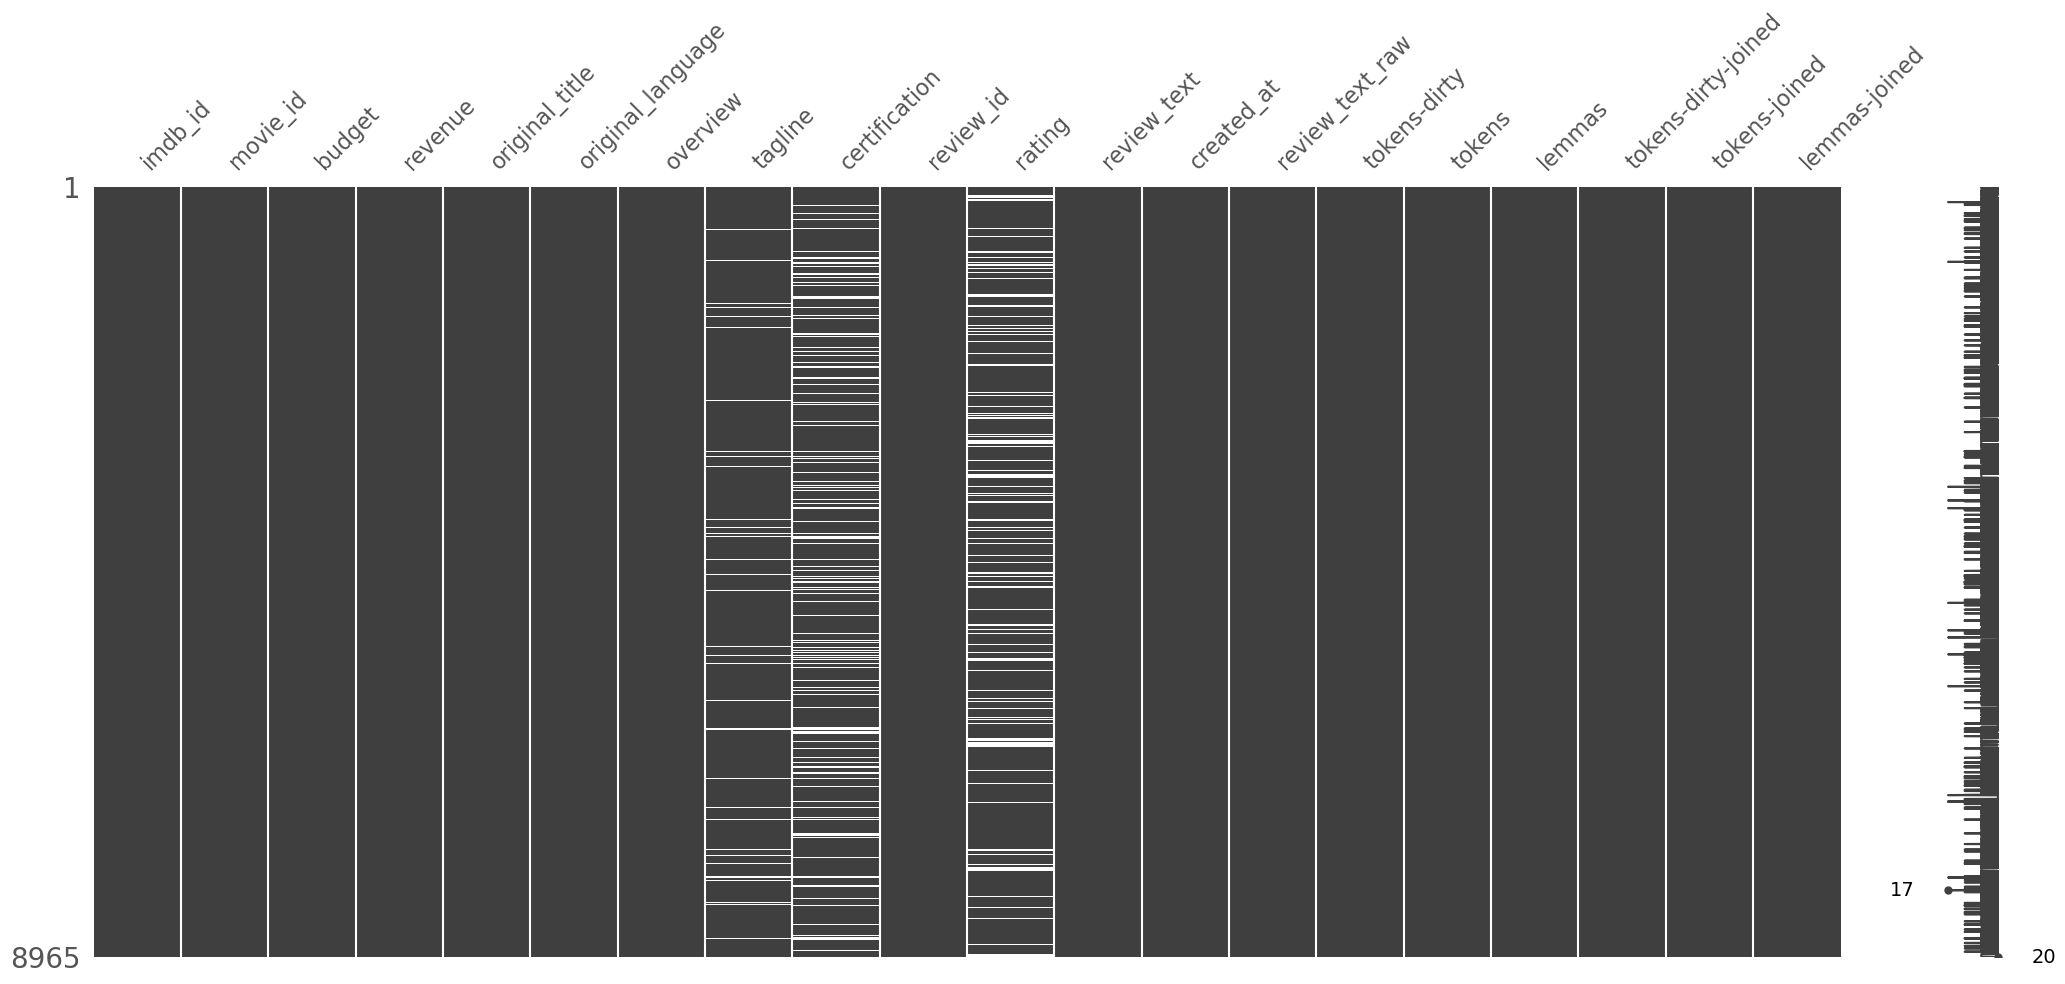

In [23]:
merged_df = pd.merge(df_movies[keep_cols_movies],df, on='movie_id',# right_on='id',
                     how='right'# Doesn't matter here
                    )
missingno.matrix(merged_df)

In [24]:
merged_df.head()

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,NaN,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,tt0257516,10012,35000000,19300000,Cursed,en,"In Los Angeles, siblings Ellie and Jimmy come ...",What doesn't kill you makes you stronger.,PG-13,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...


In [25]:
merged_df.duplicated(subset=['movie_id','imdb_id','review_id']).sum()

0

In [26]:
# merged_df['original_language'].value_counts()

In [27]:
# merged_df = pd.merge(df, df_movies, left_on='movie_id', right_on='id', how='inner')
# missingno.matrix(merged_df)

In [28]:
fpath_out_combined_reviews_movies

'Data-NLP/combined-tmdb-movie-reviews-with-info.json'

In [29]:
merged_df.to_json(fpath_out_combined_reviews_movies)

### Opt B) Load Reviews from AWS RDS

In [30]:
# from custom_functions import aws_mysql
# conn, engine = aws_mysql.connect_to_aws_rds(include_engine=True)
# conn, engine

In [31]:
# ## Test your connection by checking for any tables that exist (there should be none at this point)
# q = """SHOW TABLES;"""
# tables = pd.read_sql(q, conn)
# tables

In [32]:
# q = "SELECT * FROM reviews"
# reviews_sql_df = pd.read_sql(q, conn)
# reviews_sql_df

In [33]:
# reviews_sql_df.duplicated(subset=dup_cols).sum() 

In [34]:
# reviews_sql_df = reviews_sql_df.drop_duplicates(subset=dup_cols)
# reviews_sql_df

In [35]:
# df  = reviews_sql_df.copy()
# df

> NOTE: Now that done with selecting workflow, should prob move duplciate checking code below selecting final df

## Preprocessinig 

In [36]:
df = pd.read_json(fpath_out_combined_reviews_movies)
df

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,None,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,tt0257516,10012,35000000,19300000,Cursed,en,"In Los Angeles, siblings Ellie and Jimmy come ...",What doesn't kill you makes you stronger.,PG-13,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jumpstart a dormant p...,A new age has come.,PG-13,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear marvel get catch make sure character get ...
8961,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jum

In [37]:
# # df = merged_df.copy()
# df = df.set_index('review_id')
# df

<Axes: >

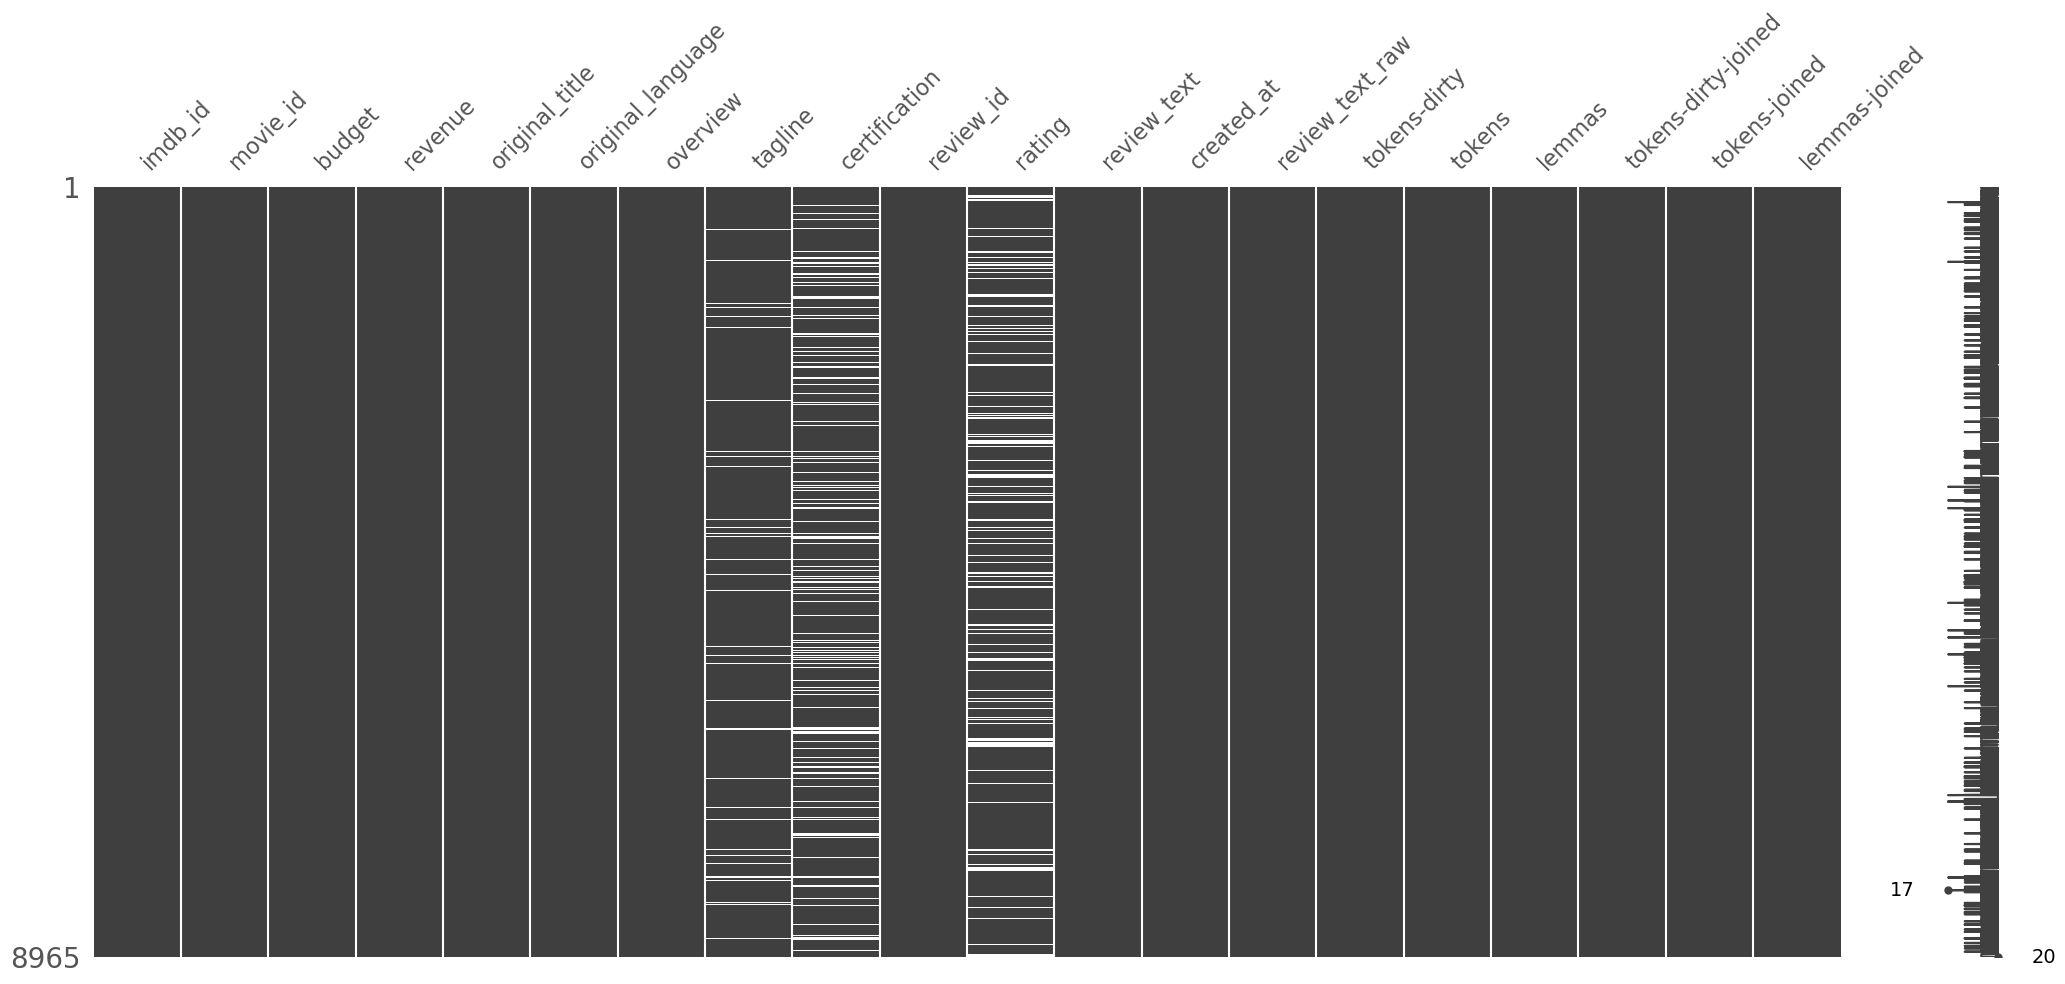

In [38]:
import missingno
missingno.matrix(df)

In [39]:
df.duplicated('review_text').sum()

4

In [40]:
# Dropna and rename columns
df = df.dropna(subset=['review_text'])
df = df.rename({'author_rating':'rating'},axis=1)
df

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,None,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,tt0257516,10012,35000000,19300000,Cursed,en,"In Los Angeles, siblings Ellie and Jimmy come ...",What doesn't kill you makes you stronger.,PG-13,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jumpstart a dormant p...,A new age has come.,PG-13,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear marvel get catch make sure character get ...
8961,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jum

imdb_id                   0
movie_id                  0
budget                    0
revenue                   0
original_title            0
original_language         0
overview                  0
tagline                 469
certification          1413
review_id                 0
rating                 1215
review_text               0
created_at                0
review_text_raw           0
tokens-dirty              0
tokens                    0
lemmas                    0
tokens-dirty-joined       0
tokens-joined             0
lemmas-joined             0
dtype: int64

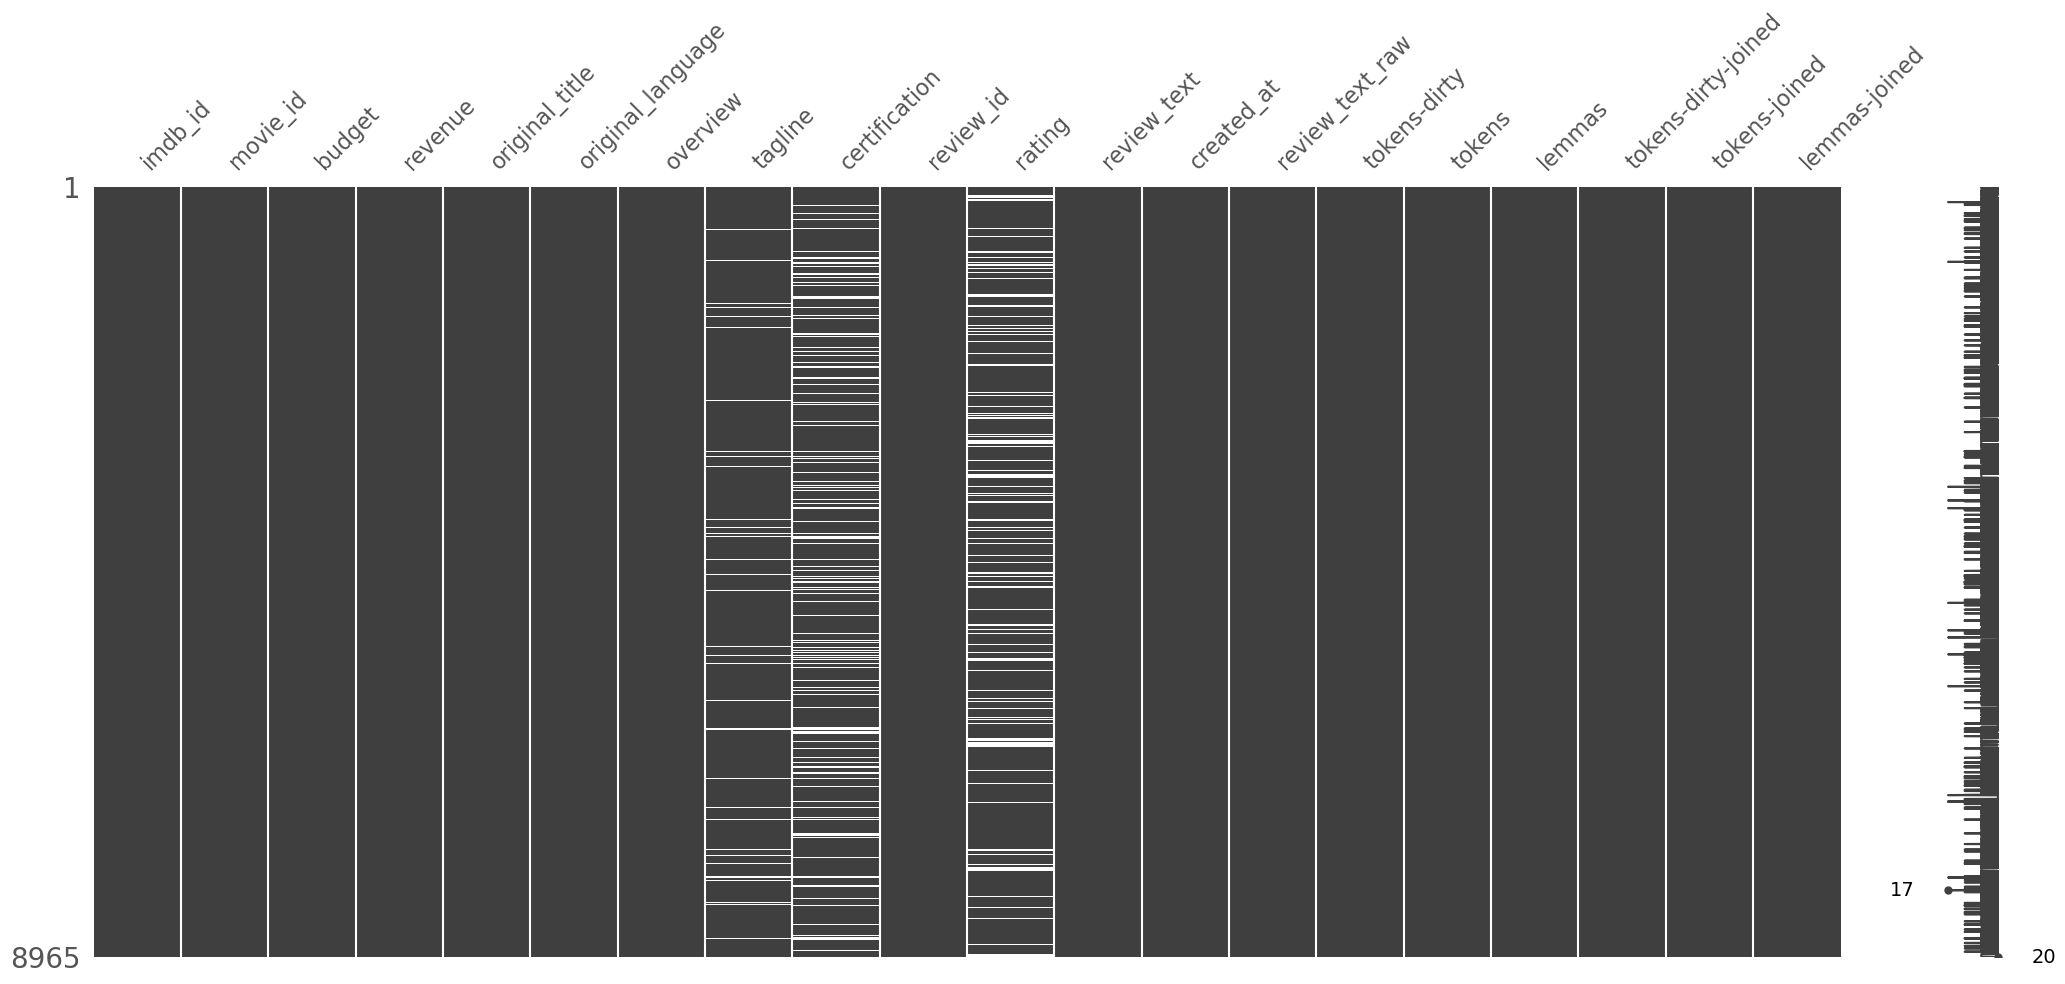

In [41]:
# Check for null values
missingno.matrix(df)
df.isna().sum()

In [42]:
# # Dropping reviews without a rating
# df_ratings = df.dropna(subset=['rating'])
# missingno.matrix(df_ratings)

In [43]:
# df

In [44]:
df.isna().sum()

imdb_id                   0
movie_id                  0
budget                    0
revenue                   0
original_title            0
original_language         0
overview                  0
tagline                 469
certification          1413
review_id                 0
rating                 1215
review_text               0
created_at                0
review_text_raw           0
tokens-dirty              0
tokens                    0
lemmas                    0
tokens-dirty-joined       0
tokens-joined             0
lemmas-joined             0
dtype: int64

In [45]:
# raise Exception("Change the dataframes used below depending on if using revenue or ratings")

## Set Groups (for EDA & Modeling)

- Ratings-based
  
    - Convert to a category
 
    - each review has its own rating



- Revenue Based:
    - Match reviews to movies
    - Either use regression target or classification target

### Define Groups - Profitable

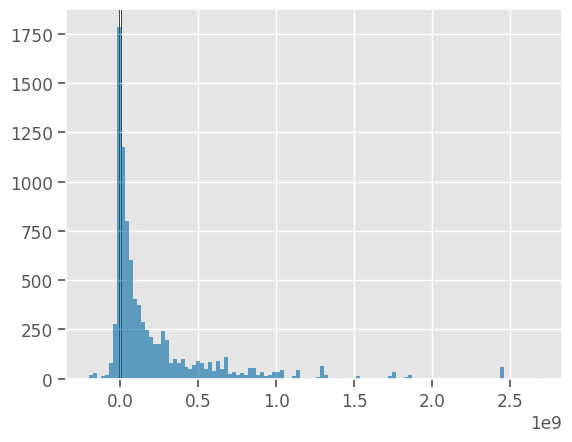

In [46]:
df['profit'] = df['revenue'] - df['budget']
ax = df['profit'].hist(bins='auto',alpha=.6);
ax.axvline(0, color='k',lw=2,zorder=0);

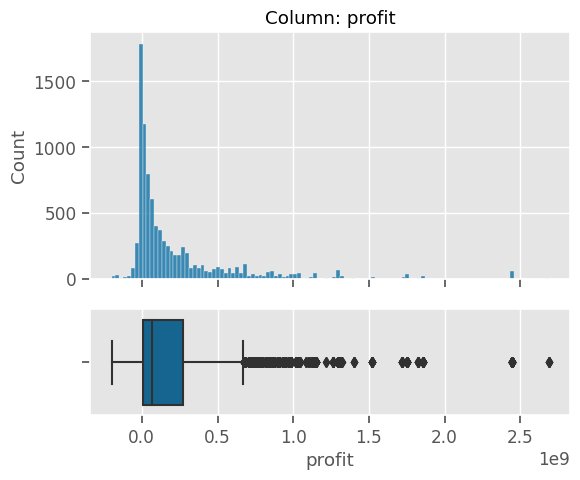

- NaN's Found: 0 (0.0%)


In [47]:
fig, ax=  ds.eda.explore_numeric(df, 'profit')

In [48]:
# df['revenue'].median()
df['profit'].median()

68903124.0

In [49]:
f"${5e8:,.0f}"

'$500,000,000'

In [50]:
f"${1e9:,.0f}"

'$1,000,000,000'

In [51]:
bins = [0,5e8, 1e9, np.inf]

In [52]:
# df['target-revenue']  = pd.cut(df['revenue'],bins, right=True)
# df['target-revenue'].value_counts(dropna=False, normalize=True)
(df['profit']>0).value_counts(1)

True     0.799442
False    0.200558
Name: profit, dtype: float64

In [53]:
# Set target based on revenue surpassing budget
df['target-profit'] =( df['revenue'] > df['budget']).astype(str) #*2 # if wanted to make more than twice the budget back
df['target-profit'].value_counts(dropna=False,normalize=True)

True     0.799442
False    0.200558
Name: target-profit, dtype: float64

### Define Groups - Ratings

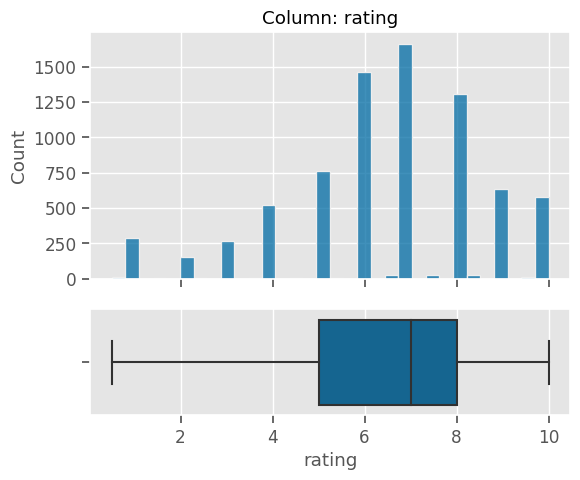

- NaN's Found: 1215 (13.55%)


In [54]:
fig, ax = ds.eda.explore_numeric(df, 'rating')

Binary:
- "High Rating": >= 9
- "Low Rating": <= 4

Multiclass:
- "High Rating": >= 8
- "Mid Rating": 4< x < 8
- "Low Rating": <4

In [55]:
def set_group_binary(x):
    if x >= 9:
        group = "High"
    elif x<=4:
        group="Low"
    else:
        group = pd.NA
    return group


def set_groups_multi(x):
    if x >= 8:
        group = "High"
    elif x>=4:
        group = "Mid"
    else:
        group= "Low"
    return group

In [56]:
# df_ml = df.copy()
target_col = 'target-rating'
df[target_col] = df['rating'].map(set_groups_multi)#set_group_binary)
df[target_col].value_counts(dropna=False, normalize=True)

Mid     0.498717
High    0.284551
Low     0.216732
Name: target-rating, dtype: float64

In [57]:
# # df_ml = df.copy()
# target_col_binary = 'target-rating-binary'
# df[target_col_binary] = df['rating'].map(set_group_binary)#set_group_binary)
# df[target_col_binary].value_counts(dropna=False, normalize=True)

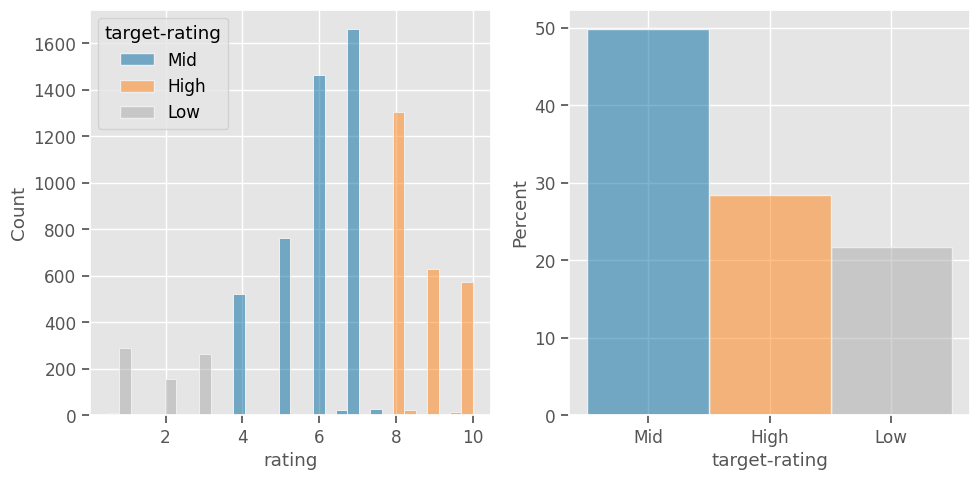

In [58]:
fig, axes =  plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df, x='rating', hue=target_col, ax=axes[0])
sns.histplot(data=df, x=target_col, hue=target_col, ax=axes[1], legend=False, stat='percent')
fig.tight_layout()

### Save for Modeling (Part 6C)

In [59]:
df

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,profit,target-profit,target-rating
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...,129837010,True,Mid
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,None,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested,15612137,True,Mid
2,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...,122397798,True,Mid
3,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...,122397798,True,Mid
4,tt0257516,10012,35000000,19300000,Cursed,en,"In Los Angeles, siblings Ellie and Jimmy come ...",What doesn't kill you makes you stronger.,PG-13,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...,-15700000,False,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jumpstart a dormant p...,A new age has come.,PG-13,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear 

In [60]:
fpath_out_ml_with_targets

'Data-NLP/processed-nlp-reviews-for-ml.json'

In [61]:
df.to_json(fpath_out_ml_with_targets)

In [62]:
pd.read_json(fpath_out_ml_with_targets)

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,profit,target-profit,target-rating
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...,129837010,True,Mid
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,None,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested,15612137,True,Mid
2,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...,122397798,True,Mid
3,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...,122397798,True,Mid
4,tt0257516,10012,35000000,19300000,Cursed,en,"In Los Angeles, siblings Ellie and Jimmy come ...",What doesn't kill you makes you stronger.,PG-13,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...,-15700000,False,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jumpstart a dormant p...,A new age has come.,PG-13,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear 

### NLP Preprocessing

In [63]:
# THRESH = 1000
# df['length'] = df['review_text'].map(lambda x: len(x.split()))
# df = df.copy()
# ax = sns.histplot(data=df, x='length')
# ax.axvline(THRESH, color='red', ls=':');
# ax.set(title='Review Lengths (Whitespace Tokens)')

# Part 2) EDA and Visualization

**2) EDA and Visualization:**

- Create word clouds to visualize the most frequent and significant words in each group.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your wordclouds as .png files in the "Images/" folder in your repo.**



- Apply nltk's `FreqDist` class to compare the frequency distribution of words in the review groups.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your freq dist plots as .png files in the "Images/" folder in your repo.**



- Perform n-grams analysis (bigrams and trigrams),
    - Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)
    - Focus on bigrams or trigrams, using NLTK's `BigramCollocationFinder` and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.
    - Describe any differences. What do these differences tell you?
    - `Save your...`?



- Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

    - Compare the sentiments of high-rating and low-rating texts.

    - Compare the average sentiment scores for high and low-rating reviews.

    - Which review polarity scores don't match the ratings? Why do you think this is?

        

**3) Evaluation and Reporting:**

- Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?
    - List 3 things associated with high-rating reviews
    - List 3 things associated with low-rating reviews.

> Adding imports as-if standalone notebook

In [64]:
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

import spacy
# nlp_custom = fn.nlp.make_custom_nlp(disable=['ner','parser'],contractions=[],
#                             stopwords_to_add=["★"])
# nlp_custom
# # Disable parser and ner
# # nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])

## Checking for Bad Reviews (HTML)

- There were URLs and html tags in the bigrams/trigrams (PMI).
- Checking for and removing reviews that contain these artificats (if we can afford to drop)

### `ADMIN TO DO`:
>- Discuss with Brenda if should warn students.

In [65]:
# filter_http = df['review_text'].str.contains('http')
# filter_http.sum()

In [66]:
# filter_hrefs = df['review_text'].str.contains('href')
# filter_hrefs.sum()

In [67]:
# (filter_http | filter_hrefs).sum()

## WordClouds

In [68]:
target_col

'target-rating'

In [69]:
df[target_col].value_counts(1)

Mid     0.498717
High    0.284551
Low     0.216732
Name: target-rating, dtype: float64

In [70]:
filter_low = df[target_col] == "Low"
filter_high = df[target_col] == "High"
filter_low.sum(), filter_high.sum()

(1943, 2551)

In [71]:
high_reviews_text = " ".join( df.loc[filter_high, 'review_text'])
high_reviews_text[:100]

"If you like dancing movies then you'll love this movie. Jessica Alba teaches kids and teens how to d"

In [72]:
low_reviews_text = " ".join( df.loc[filter_low, 'review_text'])
low_reviews_text[:100]

"This movie is very good I loved it so much. Get Rich or Die Tryin' reminds me of the apocryphal Chin"

In [73]:
# df.head()

In [74]:

# Make a single giant string with entire groups tokens
high_reviews_tokens = " ".join( df.loc[filter_high, 'tokens-joined'])
low_reviews_tokens = " ".join( df.loc[filter_low, 'tokens-joined'])

high_reviews_lemmas =  " ".join( df.loc[filter_high, 'lemmas-joined'])
low_reviews_lemmas =  " ".join( df.loc[filter_low, 'lemmas-joined'])

In [75]:
# Create lists of all lemmas in both high and low review groups
# Create lists of all lemmas in both high and low review groups
high_review_tokens_list = df.loc[filter_high, 'tokens'].explode().astype(str).to_list()
low_review_tokens_list = df.loc[filter_low, 'tokens'].explode().astype(str).to_list()

high_review_lemmas_list = df.loc[filter_high, 'lemmas'].explode().astype(str).to_list()
low_review_lemmas_list = df.loc[filter_low, 'lemmas'].explode().astype(str).to_list()
high_review_tokens_list[:5], low_review_lemmas_list[:5]

(['like', 'dancing', 'movies', 'love', 'movie'],
 ['movie', 'good', 'love', 'rich', 'die'])

In [76]:
from wordcloud import WordCloud, STOPWORDS

In [77]:
# Make word clouds of raw text
custom_stopwords = [*STOPWORDS, 'film','movie']
custom_stopwords[:10],custom_stopwords[-5:]

(['if',
  "shouldn't",
  'down',
  "won't",
  'own',
  "they'll",
  'she',
  'or',
  'to',
  'as'],
 ['further', 'any', 'what', 'film', 'movie'])

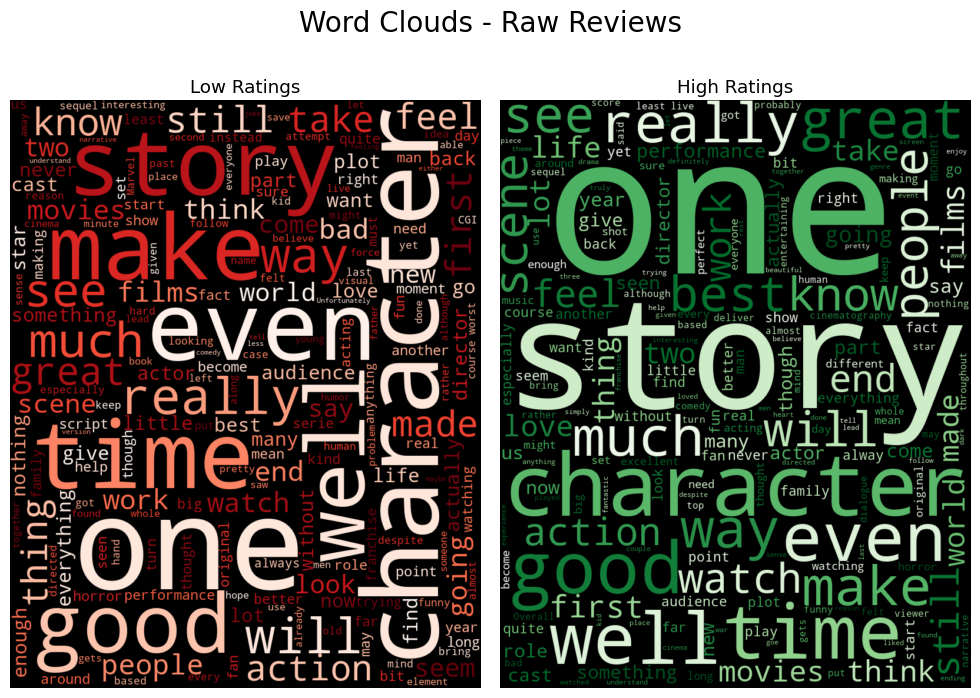

In [78]:
# Create an instance of a WordCloud and use the generate method
shared_cloud_kws = dict(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2,
                       stopwords=custom_stopwords)
low_cloud = WordCloud( colormap="Reds", **shared_cloud_kws).generate(low_reviews_text)
high_cloud = WordCloud(colormap="Greens",**shared_cloud_kws).generate(high_reviews_text)

# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Raw Reviews', fontsize=20, y=1.05);
fig.savefig(FPATHS['eda']['wordclouds'], dpi=300, transparent=False, bbox_inches='tight')

## FreqDist

In [79]:
from nltk import FreqDist

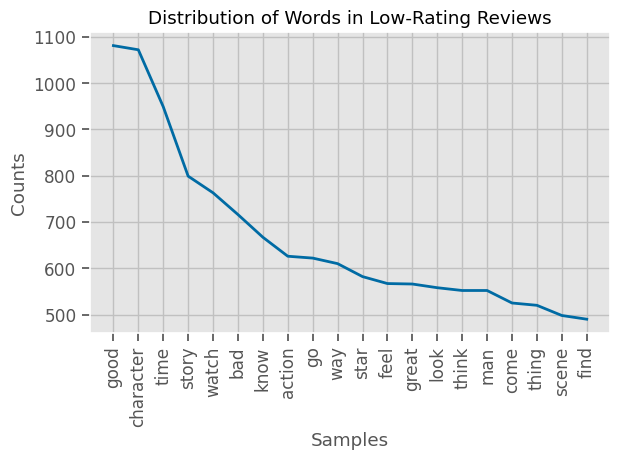

In [80]:
# Split the lemmas into individual token words
low_dist = FreqDist(
    # List comp to remove stopwords for EDA
    [w for w in low_review_lemmas_list if w not in custom_stopwords]
)
ax = low_dist.plot(20, show = False, title='Distribution of Words in Low-Rating Reviews')
plt.tight_layout()
# plt.savefig('Images/freq_dist_low_ratings.png')

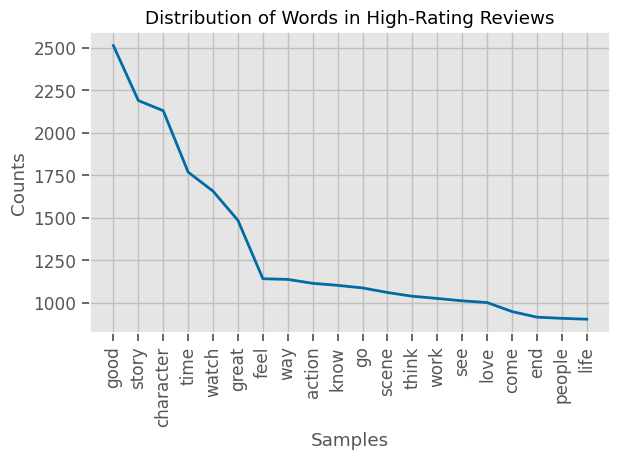

In [81]:
# Split the lemmas into individual token words
# high_review_lemmas_split = high_reviews_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
high_dist = FreqDist(    # List comp to remove stopwords for EDA
    [w for w in high_review_lemmas_list if w not in custom_stopwords])#high_review_lemmas_split)
ax = high_dist.plot(20, show = False, title='Distribution of Words in High-Rating Reviews')
plt.tight_layout()
# plt.savefig('Images/freq_dist_high_ratings.png')

## Ngram Analysis

### ✅TO DO: Remove Pre-function bigram code

In [82]:
import pandas as pd
import nltk
def get_ngram_measures_finder(tokens, ngrams=2, get_scores_df=False, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
   
    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams



### Bigrams - Raw Frequency

- Doing the first set manually for demonstration.

In [83]:
# Getting bigrams low-reviews
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder_low = nltk.collocations.BigramCollocationFinder.from_words(low_review_tokens_list)
low_scored_ngrams = finder_low.score_ngrams( bigram_measures.raw_freq)

# Convert list of tuples to dataframe
df_bigram_scores_low = pd.DataFrame(low_scored_ngrams, columns=['Words','Frequency'])
df_bigram_scores_low.head(10)

# low_scored_ngrams[:10]

,Words,Frequency
0,"(special, effects)",0.000533
1,"(star, wars)",0.000527
2,"(4, stars)",0.000451
3,"(spider, man)",0.000446
4,"(feels, like)",0.000413
5,"(sci, fi)",0.000397
6,"(big, screen)",0.000386
7,"(critic, rating)",0.000342
8,"(final, rating:)",0.000331
9,"(rating:, ½)",0.000331


In [84]:
# Getting bigrams low-reviews
# measures = nltk.collocations.BigramAssocMeasures()
finder_high = nltk.collocations.BigramCollocationFinder.from_words(high_review_tokens_list)
high_scored_ngrams = finder_high.score_ngrams( bigram_measures.raw_freq)

# Convert list of tuples to dataframe
df_bigram_scores_high = pd.DataFrame(high_scored_ngrams, columns=['Words','Frequency'])
df_bigram_scores_high.head(10)
# high_scored_ngrams[:10]

,Words,Frequency
0,"(special, effects)",0.000443
1,"(sci, fi)",0.000414
2,"(comic, book)",0.000359
3,"(spoiler, free)",0.000347
4,"(john, wick)",0.000305
5,"(real, life)",0.000289
6,"(feel, like)",0.000279
7,"(good, movie)",0.000266
8,"(action, movie)",0.000263
9,"(review, link)",0.000257


In [85]:
# Combine low and high reviews score dfs and add a group name as multi-index
df_compare_bigrams = pd.concat(
    [df_bigram_scores_high, df_bigram_scores_low],
    axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"],
)
top10_bigrams = df_compare_bigrams.head(10)
top10_bigrams

High Rating Reviews            Low Rating Reviews          
                Words Frequency               Words Frequency
0  (special, effects)  0.000443  (special, effects)  0.000533
1           (sci, fi)  0.000414        (star, wars)  0.000527
2       (comic, book)  0.000359          (4, stars)  0.000451
3     (spoiler, free)  0.000347       (spider, man)  0.000446
4        (john, wick)  0.000305       (feels, like)  0.000413
5        (real, life)  0.000289           (sci, fi)  0.000397
6        (feel, like)  0.000279       (big, screen)  0.000386
7       (good, movie)  0.000266    (critic, rating)  0.000342
8     (action, movie)  0.000263    (final, rating:)  0.000331
9      (review, link)  0.000257        (rating:, ½)  0.000331

> Using df.to_markdown() to get a string with a Markdown table.

In [86]:
# Generating string table to insert into a Markdown cell or file
md_table_bigrams = df_compare_bigrams.head(10).to_markdown(index=False)
print(md_table_bigrams)

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000442817 | ('special', 'effects')            |                           0.000532516 |
| ('sci', 'fi')                      |                            0.000413938 | ('star', 'wars')                  |                           0.000527082 |
| ('comic', 'book')                  |                            0.000359388 | ('4', 'stars')                    |                           0.000451009 |
| ('spoiler', 'free')                |                            0.000346553 | ('spider', 'man')                 |                           0.000445575 |
| ('john', 'wick')                   |                          

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000486304 | ('final', 'rating')               |                           0.00123491  |
| ('comic', 'book')                  |                            0.000470359 | ('finished', 'product')           |                           0.000926185 |
| ('sci', 'fi')                      |                            0.00039861  | ('appeal', 'poor')                |                           0.000916537 |
| ('star', 'wars')                   |                            0.000390637 | ('poor', 'finished')              |                           0.000916537 |
| ('action', 'movie')                |                            0.000366721 | ('rating', 'things')              |                           0.000916537 |
| ('feel', 'like')                   |                            0.000358749 | ('things', 'appeal')              |                           0.000916537 |
| ('john', 'wick')                   |                            0.000342804 | ('special', 'effects')            |                           0.000627104 |
| ('watch', 'movie')                 |                            0.00032686  | ('avoid', 'possible')             |                           0.00055957  |
| ('long', 'time')                   |                            0.000302943 | ('boring', 'disappointing')       |                           0.00055957  |
| ('real', 'life')                   |                            0.000302943 | ('disappointing', 'avoid')        |                           0.00055957  |

In [87]:
# Demonstrating how the string will display in markdown:
from IPython.display import Markdown
Markdown(md_table_bigrams)

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000442817 | ('special', 'effects')            |                           0.000532516 |
| ('sci', 'fi')                      |                            0.000413938 | ('star', 'wars')                  |                           0.000527082 |
| ('comic', 'book')                  |                            0.000359388 | ('4', 'stars')                    |                           0.000451009 |
| ('spoiler', 'free')                |                            0.000346553 | ('spider', 'man')                 |                           0.000445575 |
| ('john', 'wick')                   |                            0.000304838 | ('feels', 'like')                 |                           0.000412972 |
| ('real', 'life')                   |                            0.000288794 | ('sci', 'fi')                     |                           0.00039667  |
| ('feel', 'like')                   |                            0.000279167 | ('big', 'screen')                 |                           0.000385802 |
| ('good', 'movie')                  |                            0.000266332 | ('critic', 'rating')              |                           0.000342332 |
| ('action', 'movie')                |                            0.000263123 | ('final', 'rating:')              |                           0.000331464 |
| ('review', 'link')                 |                            0.000256706 | ('rating:', '½')                  |                           0.000331464 |

In [88]:
# saving the markdown table to a .md file
fname_bigram_freq = "Images/bigrams-raw-freq.md"
with open(fname_bigram_freq, 'w') as f:
    f.write(md_table_bigrams)

In [89]:
# Testing the saved table
with open(fname_bigram_freq) as f:
    display(Markdown(f.read()))

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000442817 | ('special', 'effects')            |                           0.000532516 |
| ('sci', 'fi')                      |                            0.000413938 | ('star', 'wars')                  |                           0.000527082 |
| ('comic', 'book')                  |                            0.000359388 | ('4', 'stars')                    |                           0.000451009 |
| ('spoiler', 'free')                |                            0.000346553 | ('spider', 'man')                 |                           0.000445575 |
| ('john', 'wick')                   |                            0.000304838 | ('feels', 'like')                 |                           0.000412972 |
| ('real', 'life')                   |                            0.000288794 | ('sci', 'fi')                     |                           0.00039667  |
| ('feel', 'like')                   |                            0.000279167 | ('big', 'screen')                 |                           0.000385802 |
| ('good', 'movie')                  |                            0.000266332 | ('critic', 'rating')              |                           0.000342332 |
| ('action', 'movie')                |                            0.000263123 | ('final', 'rating:')              |                           0.000331464 |
| ('review', 'link')                 |                            0.000256706 | ('rating:', '½')                  |                           0.000331464 |

### Bigrams - PMI

In [90]:
# Set the desired minimum frequency value, top-n and measure
bigram_kws = dict(measure='pmi',top_n =10 , min_freq=10)

# Get group bigrams
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**bigram_kws,
                                                words_colname="Bigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**bigram_kws,
                                              words_colname= "Bigrams (Low Ratings)")

# Concatenate and save top 10
df_compare_bigrams = pd.concat(
    [df_bigrams_low_pmi,df_bigrams_high_pmi, ],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
top10_bigrams_pmi = df_compare_bigrams.head(10)
display(top10_bigrams_pmi)

md_table_bigrams_pmi = top10_bigrams_pmi.to_markdown(index=False)

# saving the markdown table to a .md file
fname_bigram_pmi = "Images/bigrams-pmi.md"
with open(fname_bigram_pmi, 'w') as f:
    f.write(md_table_bigrams_pmi)

with open(fname_bigram_pmi) as f:
    display(Markdown(f.read()))

,Bigrams (Low Ratings),Pmi,Bigrams (High Ratings),Pmi
0,"(samuel, l.)",13.904635,"(dos, santos)",14.790094
1,"(heath, ledger)",13.904635,"(bona, fide)",14.664563
2,"(alicia, vikander)",13.767131,"(việt, nam)",14.664563
3,"(margot, robbie)",13.682242,"(laurence, fishburne)",14.433609
4,"(crimson, peak)",13.489597,"(rosamund, pike)",14.249526
5,"(scorch, trials)",13.419208,"(mads, mikkelsen)",14.235720
6,"(los, angeles)",13.241670,"(hans, zimmer)",14.219778
7,"(silver, lake)",13.167669,"(chang, dong)",14.217104
8,"(warner, bros.)",13.154207,"(kung, fu)",14.205131
9,"(tobey, maguire)",13.139100,"(harley, quinn)",14.162063


| Bigrams (Low Ratings)   |     Pmi | Bigrams (High Ratings)    |     Pmi |
|:------------------------|--------:|:--------------------------|--------:|
| ('samuel', 'l.')        | 13.9046 | ('dos', 'santos')         | 14.7901 |
| ('heath', 'ledger')     | 13.9046 | ('bona', 'fide')          | 14.6646 |
| ('alicia', 'vikander')  | 13.7671 | ('việt', 'nam')           | 14.6646 |
| ('margot', 'robbie')    | 13.6822 | ('laurence', 'fishburne') | 14.4336 |
| ('crimson', 'peak')     | 13.4896 | ('rosamund', 'pike')      | 14.2495 |
| ('scorch', 'trials')    | 13.4192 | ('mads', 'mikkelsen')     | 14.2357 |
| ('los', 'angeles')      | 13.2417 | ('hans', 'zimmer')        | 14.2198 |
| ('silver', 'lake')      | 13.1677 | ('chang', 'dong')         | 14.2171 |
| ('warner', 'bros.')     | 13.1542 | ('kung', 'fu')            | 14.2051 |
| ('tobey', 'maguire')    | 13.1391 | ('harley', 'quinn')       | 14.1621 |

### Trigrams - Raw Freq

In [91]:
# Set the desired minimum frequency value, top-n and measure
trigram_kws = dict(measure='raw_freq',top_n =10 , min_freq=10,
                  ngrams=3)
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**trigram_kws,
                                                words_colname="Trigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**trigram_kws,
                                              words_colname= "Trigrams (Low Ratings)")

df_compare_bigrams = pd.concat(
    [ df_bigrams_low_pmi,df_bigrams_high_pmi],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)


,Trigrams (Low Ratings),Raw Freq,Trigrams (High Ratings),Raw Freq
0,"(final, rating:, ½)",0.000331,"(spoiler, free, reviews)",0.000180
1,"(boring, disappointing, avoid)",0.000326,"(enjoy, reading, spoiler)",0.000176
2,"(disappointing, avoid, possible)",0.000326,"(free, reviews, follow)",0.000176
3,"(½, boring, disappointing)",0.000326,"(reading, spoiler, free)",0.000176
4,"(rating:, ½, boring)",0.000315,"(reviews, follow, blog)",0.000176
5,"(stars, 4, stars)",0.000293,"(spoiler, free, review)",0.000141
6,"(c, frank, ochieng)",0.000239,"(free, review, link)",0.000128
7,"(4, stars, c)",0.000223,"(watch, watch, recommend)",0.000122
8,"(stars, c, frank)",0.000223,"(follow, blog, link)",0.000116
9,"(critic, rating, stars)",0.000190,"(great, watch, watch)",0.000106


### Trigrams - PMI

In [92]:
# Set the desired minimum frequency value, top-n and measure
trigram_kws = dict(measure='pmi',top_n =10 , min_freq=10,
                  ngrams=3)
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**trigram_kws,
                                                words_colname="Trigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**trigram_kws,
                                              words_colname= "Trigrams (Low Ratings)")

df_compare_bigrams = pd.concat(
    [ df_bigrams_low_pmi,df_bigrams_high_pmi],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)


,Trigrams (Low Ratings),Pmi,Trigrams (High Ratings),Pmi
0,"(samuel, l., jackson)",25.463494,"(joseph, gordon, levitt)",27.201676
1,"(blade, runner, 2049)",24.229325,"(bong, joon, ho)",26.531825
2,"(zealots, review, www.screenzealots.com)",23.399878,"(chris, dos, santos)",26.085423
3,"(c, frank, ochieng)",23.037780,"(samuel, l., jackson)",25.953121
4,"(batman, v, superman)",22.261861,"(⭐, ⭐, ⭐)",25.558591
5,"(reviews, follow, blog)",22.260991,"(dos, santos, read)",25.539774
6,"(value, avoid, costs)",22.164812,"(=, =, =)",25.027612
7,"(reading, spoiler, free)",21.708001,"(anya, taylor, joy)",24.732522
8,"(frank, ochieng, 2016)",21.621161,"(ford, v, ferrari)",24.624992
9,"(final, rating:, ½)",21.568478,"(jake, watt, read)",23.384495


## Sentiment Analysis

Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.  
- Compare the sentiments of high-rating and low-rating texts.  
- Compare the average scores for high and low-rating reviews.  
- Which review polarity scores don't match the ratings?  Why do you think this is?

In [93]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [95]:
df.head(2)

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,profit,target-profit,target-rating
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...,129837010,True,Mid
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,None,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested,15612137,True,Mid


In [96]:
df['sentiment_scores'] = df['review_text'].map(sia.polarity_scores)
# Convert the column of dictionaries into separate columns
vader_scores = df['sentiment_scores'].apply(pd.Series)
# Join the new DataFrame with the original DataFrame
df_sentiment = pd.concat([df, vader_scores], axis=1).drop('sentiment_scores', axis=1)
df_sentiment

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,profit,target-profit,target-rating,neg,neu,pos,compound
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...,129837010,True,Mid,0.000,0.345,0.655,0.9517
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,None,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested,15612137,True,Mid,0.122,0.582,0.296,0.5106
2,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...,122397798,True,Mid,0.082,0.745,0.173,0.9382
3,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...,122397798,True,Mid,0.065,0.789,0.147,0.9514
4,tt0257516,10012,35000000,19300000,Cursed,en,"In Los Angeles, siblings Ellie and Jimmy come ...",What doesn't kill you makes you stronger.,PG-13,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...,-15700000,False,Mid,0.059,0.782,0.159,0.8138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jumpstart a dormant p...,A new age has come.,PG-13,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,

In [97]:
# Define filter for positive reviews
pos_sentiment_reviews = df_sentiment['compound'] > 0
pos_sentiment_reviews.sum()

6928

In [98]:
df_sentiment

,imdb_id,movie_id,budget,revenue,original_title,original_language,overview,tagline,certification,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,profit,target-profit,target-rating,neg,neu,pos,compound
0,tt2096672,100042,40000000,169837010,Dumb and Dumber To,en,"20 years since their first adventure, Lloyd an...",The average person uses 10% of their brain cap...,PG-13,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...,129837010,True,Mid,0.000,0.345,0.655,0.9517
1,tt0429573,10008,14000000,29612137,An American Haunting,en,Based on the true events of the only case in U...,Possession Knows No Bounds,None,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested,15612137,True,Mid,0.122,0.582,0.296,0.5106
2,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...,122397798,True,Mid,0.082,0.745,0.173,0.9382
3,tt0328880,10009,128000000,250397798,Brother Bear,en,When an impulsive boy named Kenai is magically...,Nature Calls,G,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...,122397798,True,Mid,0.065,0.789,0.147,0.9514
4,tt0257516,10012,35000000,19300000,Cursed,en,"In Los Angeles, siblings Ellie and Jimmy come ...",What doesn't kill you makes you stronger.,PG-13,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...,-15700000,False,Mid,0.059,0.782,0.159,0.8138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,tt2395427,99861,365000000,1405403694,Avengers: Age of Ultron,en,When Tony Stark tries to jumpstart a dormant p...,A new age has come.,PG-13,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,

In [99]:
# filter_mismatch_A = (df['target'] == "Bad") & pos_sentiment_reviews
# filter_mismatch_A.sum()

In [100]:
# # Define filter for negative reviews
# neg_sentiment_reviews = df_sentiment['compound'] < 0
# neg_sentiment_reviews.sum()

In [101]:
# filter_mismatch_B = (df['target'] == "High") & neg_sentiment_reviews
# filter_mismatch_B.sum()

In [102]:
# df_sentiment.loc[filter_mismatch_B]

## Part 3: Scattertext

In [116]:
# df.columns

In [117]:
target_col = "target-rating"
text_col ='review_text'
df[target_col].value_counts(dropna=False)

Mid     4471
High    2551
Low     1943
Name: target-rating, dtype: int64

In [118]:
df_eda = df.loc[ df[target_col]!='Mid']
df_eda[target_col].value_counts(dropna=False)

High    2551
Low     1943
Name: target-rating, dtype: int64

In [119]:
import scattertext
from scattertext import (
    SampleCorpora,
    produce_scattertext_explorer,
    produce_scattertext_html,
)
from scattertext.CorpusFromPandas import CorpusFromPandas

In [120]:
nlp = ds.nlp.make_custom_nlp(disable=['ner'],contractions=[],
                             # stopwords_to_add=['film','movie','review']
                            )
nlp

In [122]:
# Build the scattertext corpus object
corpus = scattertext.CorpusFromPandas(
    df_eda, category_col=target_col,
    text_col=text_col, 
    nlp=nlp
).build().remove_terms(nlp.Defaults.stop_words, ignore_absences = True)

In [123]:
# Create html visualization
# Provide file path to save
scatter_fname = FPATHS["eda"]["scattertext"]
scatter_fname

'EDA/scattertext.html'

In [124]:
scatter_html = scattertext.produce_scattertext_explorer(
    corpus,
    category="High",
    category_name="High-Rating Reviews",
    not_category_name="Low-Rating Reviews",
    protocol='http',
    minimum_term_frequency=3, 
    max_terms=100_000#50_000, # Added to speed up loading in streamlit
    max_docs_per_category=1_000,#500, #Added to speed up loading in streamlit
    width_in_pixels=1000, # Setting a fixed width of 1000 pixels
    metadata=df_eda[['original_title','rating']],
)
open(scatter_fname, "wb").write(scatter_html.encode("utf-8"))
print(f"Open {scatter_fname} in Chrome or Firefox.")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (169474389.py, line 8)

# APPENDIX/TO DO

In [103]:
raise Exception("Work in progress. Do not run code below this point.")

Exception: Work in progress. Do not run code below this point.

### To DO:
- Research for cutoffs for revenue

In [ ]:
# fig, axes=  ds.eda.explore_numeric(df, 'revenue')
# axes[0].axvline(df['revenue'].median(), color='red',ls=':', label='Median')
# axes[1].axvline(df['revenue'].median(), color='red',ls=':', label='Median')
# axes[0].legend()
# fig

## ~~📌 BOOKMARK 01/22/24 `MOVE TO PREVIOUS NOTEBOOK 6A`~~
- To DO:
    - See if the reviews with html are usable if the tags are removed via regular expressions.

### Removing HTML with Regex

In [ ]:
# df['review_text_raw'] = df['review_text'].copy()

In [ ]:
# df.loc[df['review_text'].str.contains('http')]


In [ ]:
# # Checking for raw html
# df.loc[df['review_text'].str.contains('<')]

In [ ]:
# import re

# # Regular expression to match HTML tags
# regex_html = r"<[^>]*>"

# # Apply the regex to the DataFrame column using str.replace
# df['review_text'] = df['review_text'].str.replace(regex_html, '', regex=True)
# df

In [ ]:
# # Compare original with cleaned
# compare_cols = ['review_text_raw','review_text']

# pd.set_option('display.max_colwidth',250)

In [ ]:
# df.loc[df['review_text_raw'].str.contains('<'), compare_cols]

### Replace Links with `[LINK]`

In [ ]:
# regex_url = "https?:\/\/(?:www\.)?[^\s]+"
# df.loc[df['review_text'].str.contains(regex_url), compare_cols]

In [ ]:
# df['review_text'] = df['review_text'].str.replace(regex_url, '[LINK]', regex=True)
# df

In [ ]:
# df.loc[df['review_text_raw'].str.contains('http'), compare_cols]

### Add back code to save updated df?
- Or add to notebook 6A

In [ ]:
# raise Exception("replace below code with codealone adv ml wk01")

In [ ]:
# FPATHS['data']

In [ ]:
# joblib.dump(df, fname_data_joblib)